In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [2]:
#reading the dataset
df= pd.read_csv("heart.csv")

In [3]:
#First few dataheads
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
#shape of data
df.shape

(1190, 12)

In [5]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
#describing the data
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [8]:
  #finding missing values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

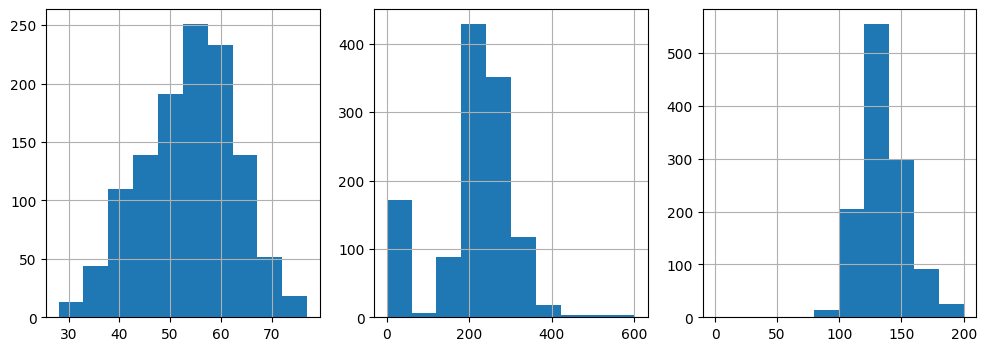

In [9]:
# Analyze feature distributions
num_features = ['age', 'cholesterol', 'resting bp s']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, feature in enumerate(num_features):
    df[feature].hist(ax=axes[i])


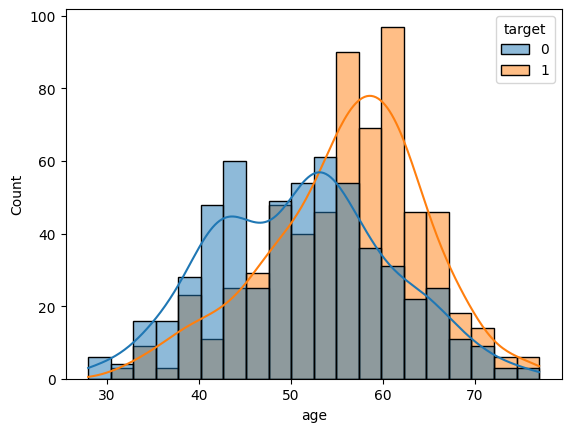

In [10]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.show()


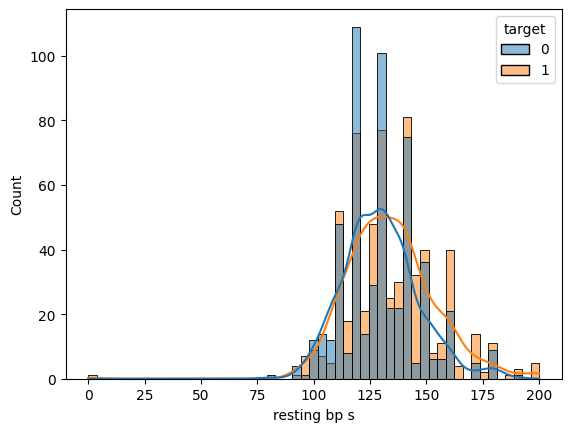

In [11]:
sns.histplot(data=df, x='resting bp s', hue='target', kde=True)
plt.show()


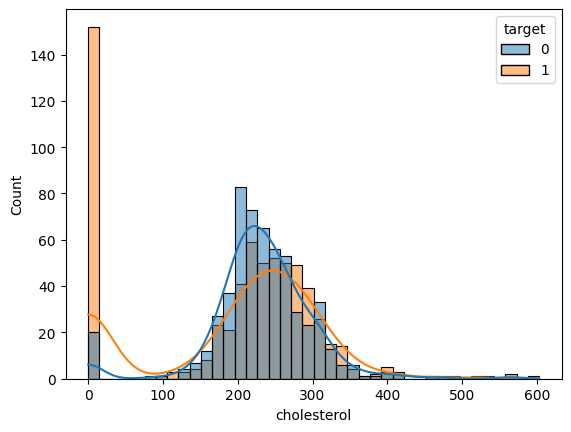

In [12]:
sns.histplot(data=df, x='cholesterol', hue='target', kde=True)
plt.show()


<Axes: >

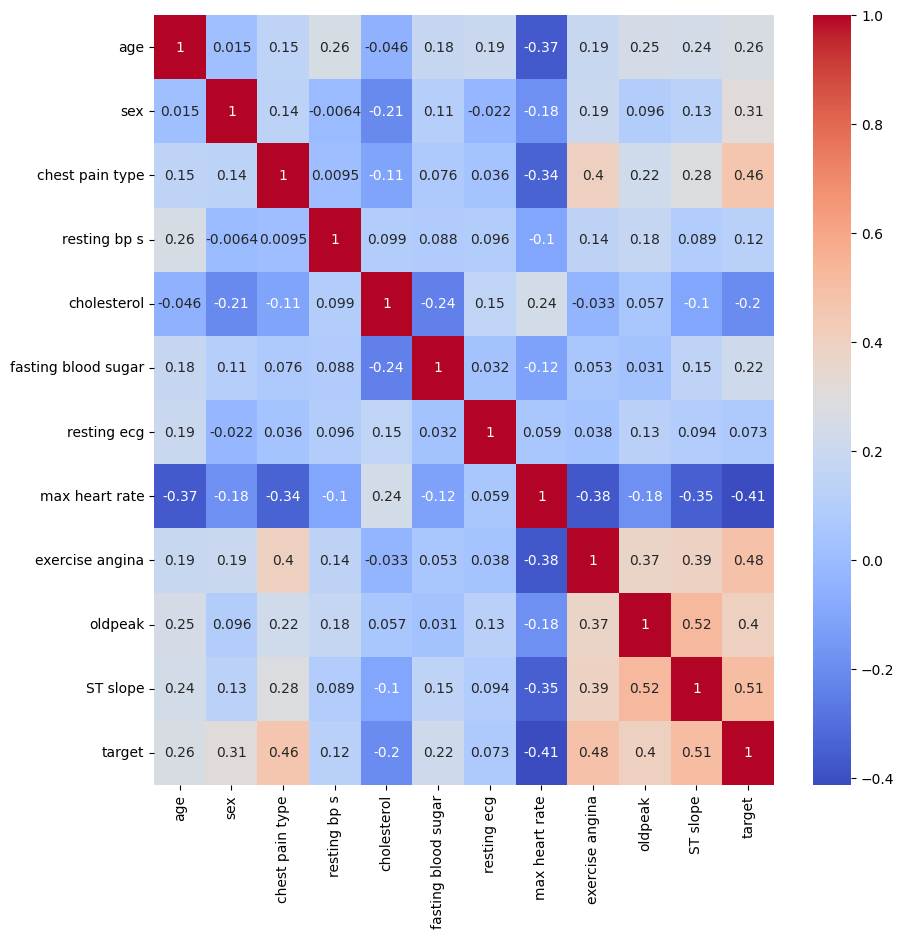

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


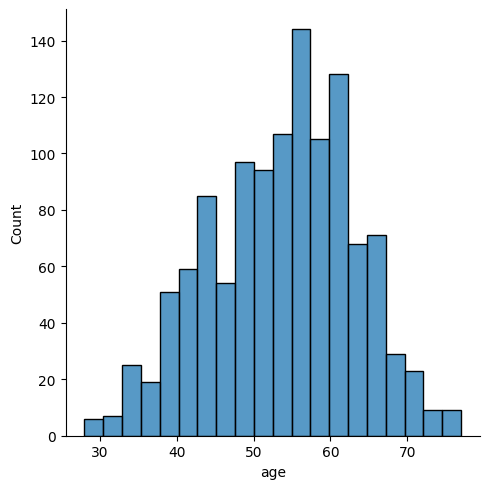

In [14]:
# Analyze age distribution
sns.displot(df['age'], bins=20)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

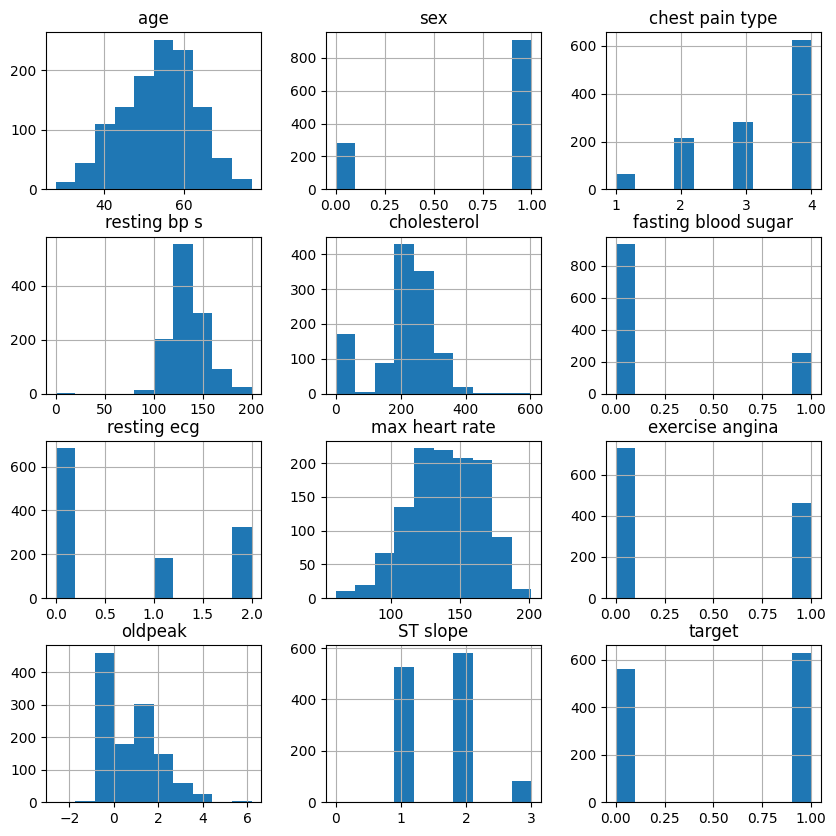

In [15]:
# Visualize distributions of numerical features
df.select_dtypes(include=[np.number]).hist(figsize=(10,10))


<Axes: xlabel='sex', ylabel='count'>

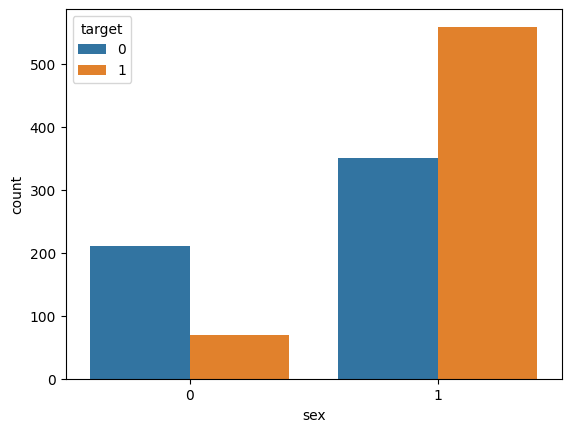

In [16]:
# Heart disease frequency for sex
sns.countplot(x='sex', hue='target', data=df)


In [17]:
# Correlation with target
corr = df.corrwith(df['target']).sort_values()
print(corr)


max heart rate        -0.413278
cholesterol           -0.198366
resting ecg            0.073059
resting bp s           0.121415
fasting blood sugar    0.216695
age                    0.262029
sex                    0.311267
oldpeak                0.398385
chest pain type        0.460127
exercise angina        0.481467
ST slope               0.505608
target                 1.000000
dtype: float64


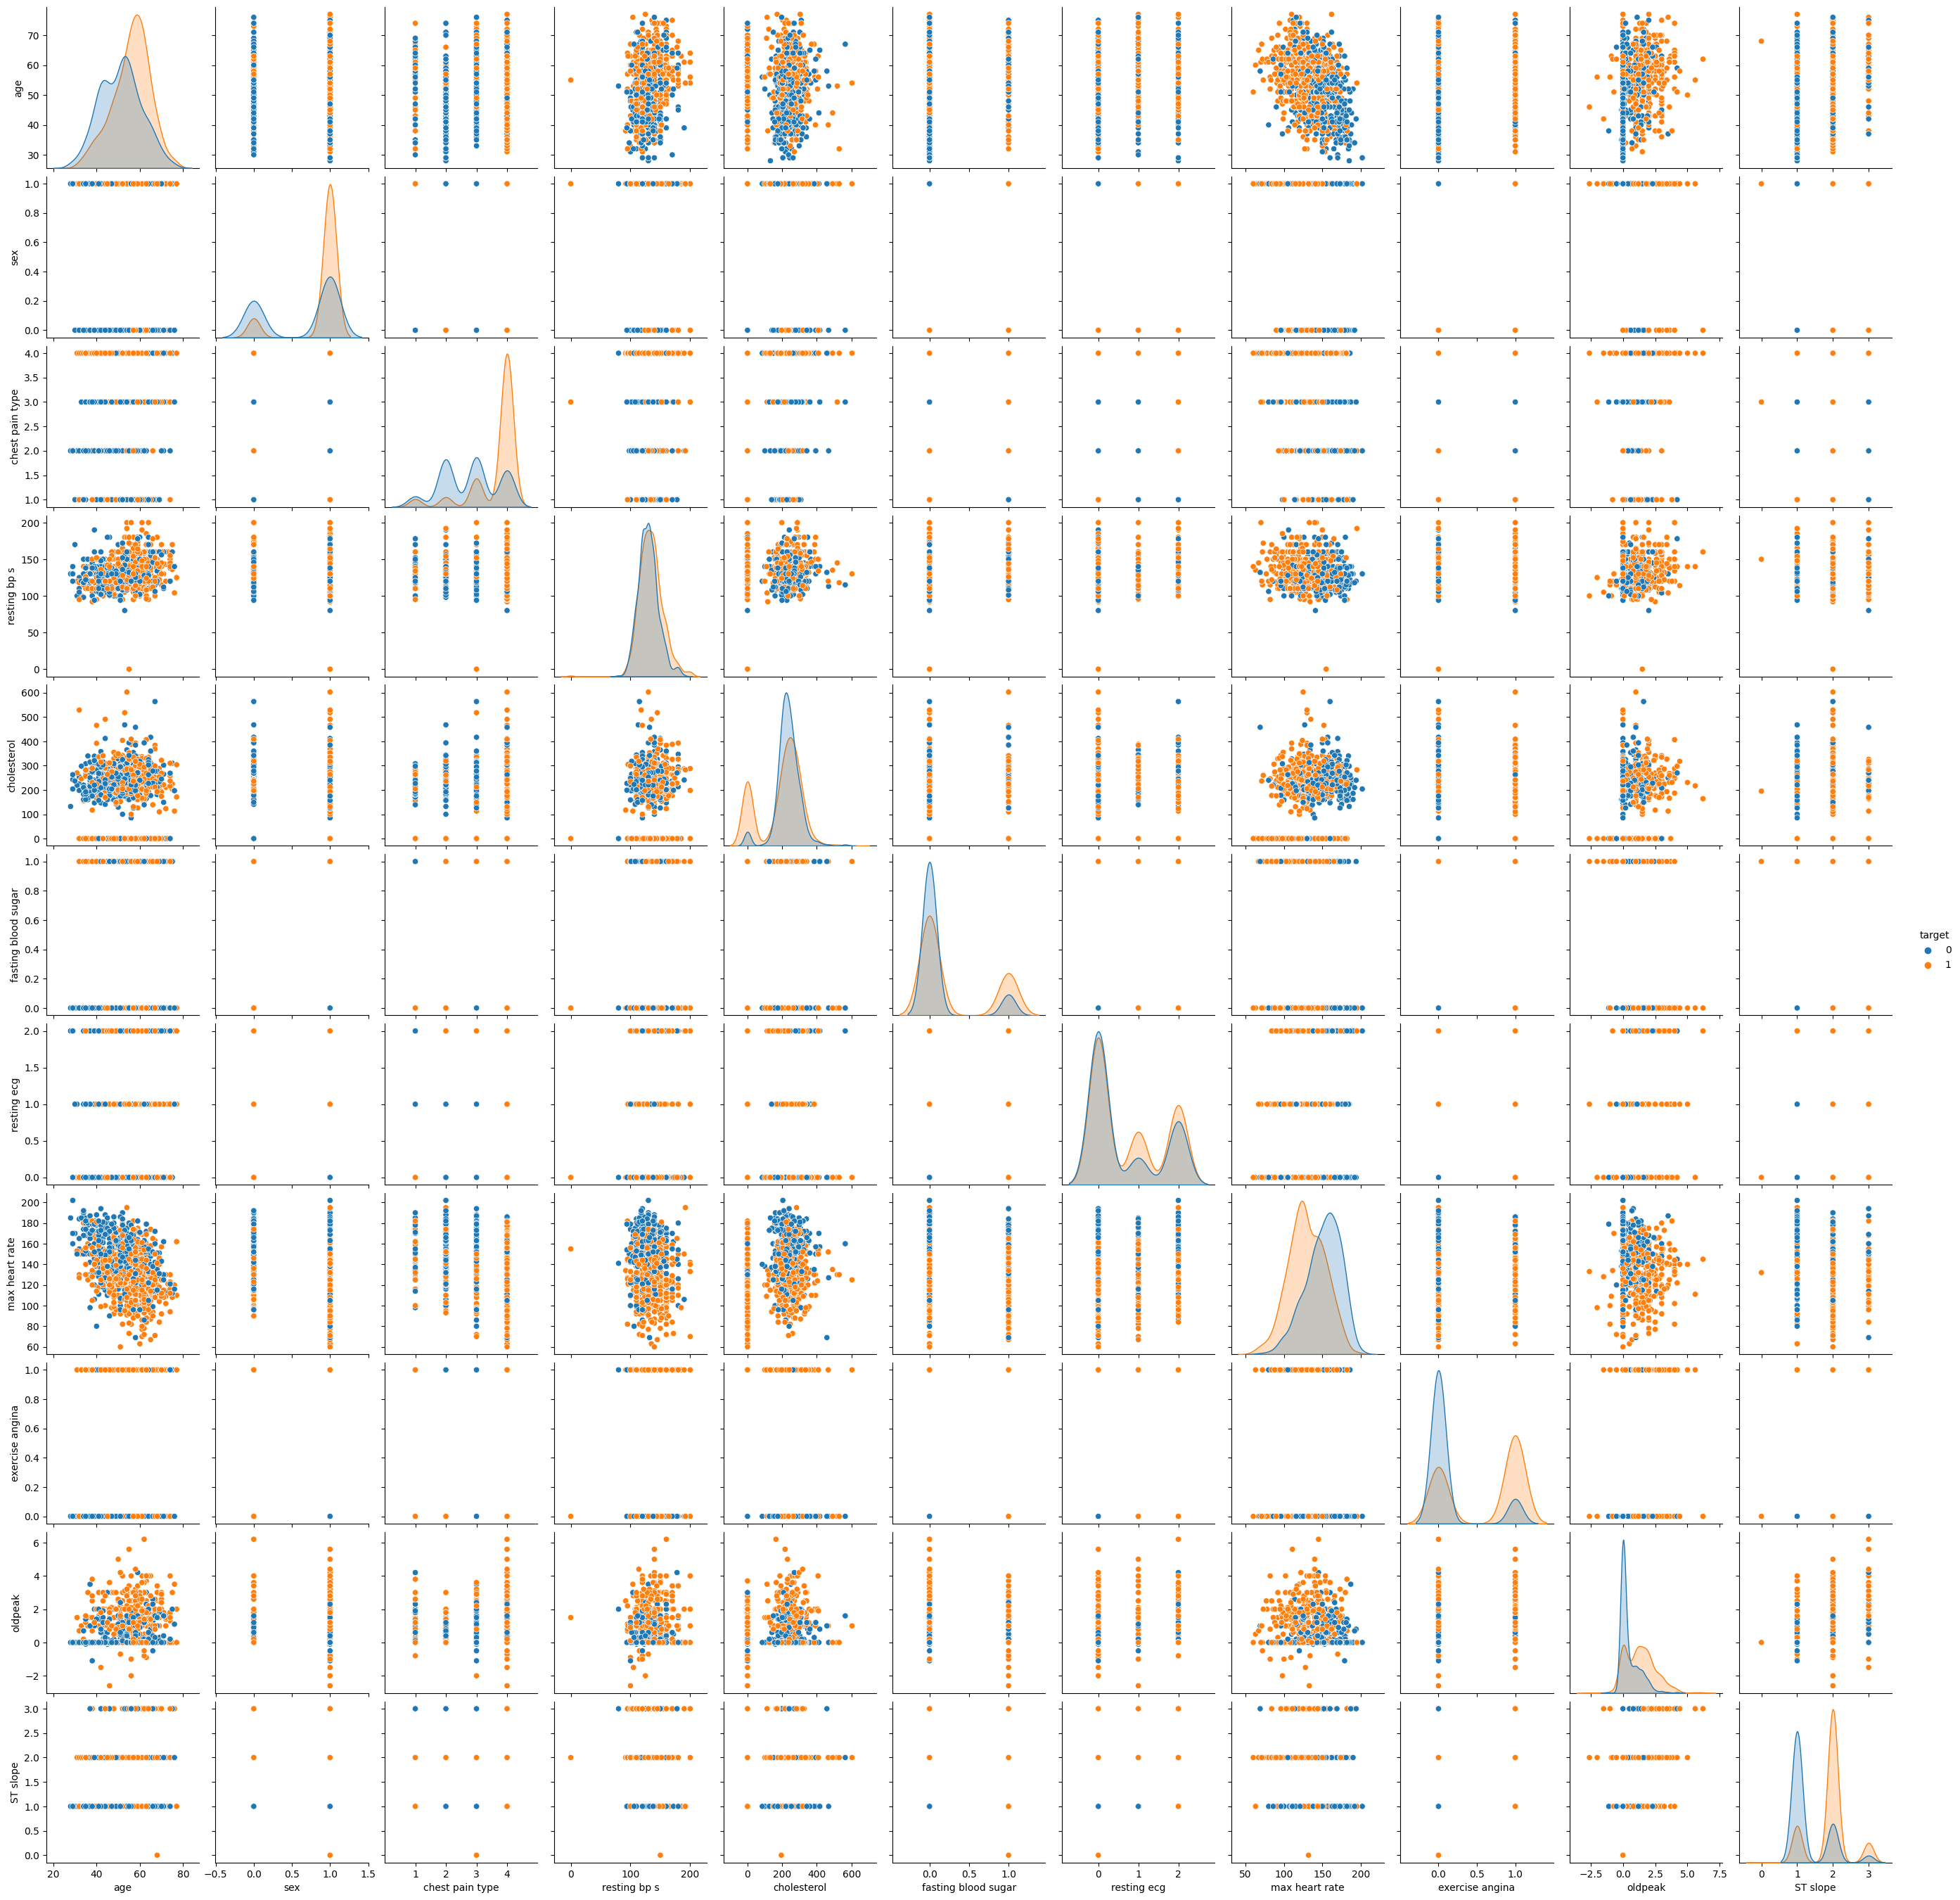

In [18]:
# Pairplot
sns.pairplot(df, hue='target')


<Axes: >

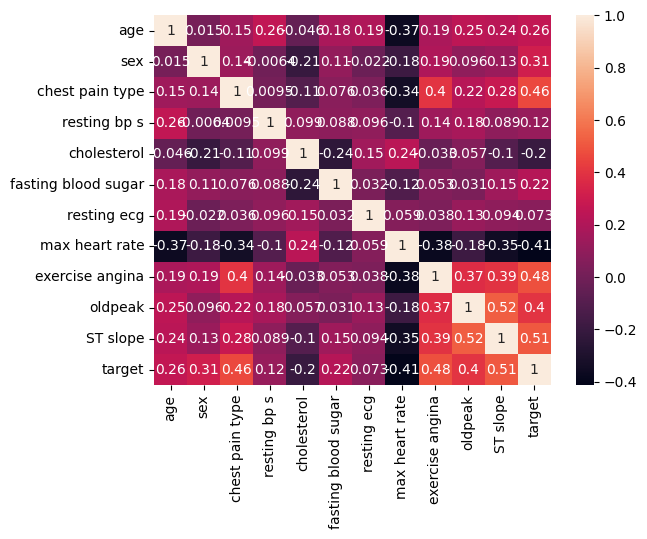

In [19]:
# Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)


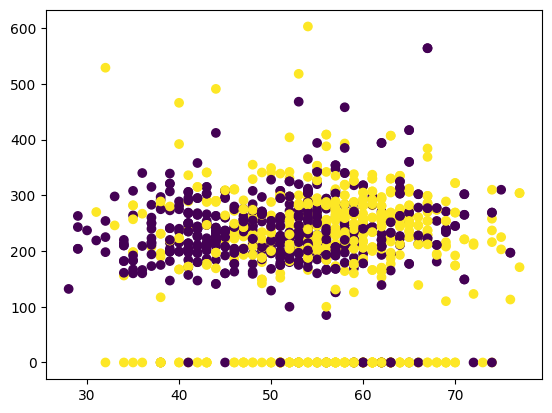

In [20]:
# Scatter plot
plt.scatter(x=df['age'], y=df['cholesterol'], c=df['target'])


In [21]:
# Feature selection
corr_matrix = df.corr()
relevant_features = corr_matrix[abs(corr_matrix['target'])>0.1].index
X = df[relevant_features]
y = df['target']


In [22]:
import warnings
warnings.filterwarnings("ignore")


In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# Model pipelines
pipe_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True))])

pipe_logreg = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])

pipe_tree = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])

pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# Hyperparameters
svm_params = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']}
logreg_params = {'logreg__C': [0.1, 1, 10]}
tree_params = {'tree__max_depth': [3, 5, 10]}
rf_params = {'rf__n_estimators': [100, 200, 500]}

# Grid search
gs_svm = GridSearchCV(pipe_svm, svm_params, cv=5)
gs_logreg = GridSearchCV(pipe_logreg, logreg_params, cv=5)
gs_tree = GridSearchCV(pipe_tree, tree_params, cv=5)
gs_rf = GridSearchCV(pipe_rf, rf_params, cv=5)

# Fit grid search
gs_svm.fit(X_train, y_train)
gs_logreg.fit(X_train, y_train)
gs_tree.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)

# Best models
best_svm = gs_svm.best_estimator_
best_logreg = gs_logreg.best_estimator_
best_tree = gs_tree.best_estimator_
best_rf = gs_rf.best_estimator_

# Evaluate models
for model,name in zip([best_svm, best_logreg, best_tree, best_rf],['SVM', 'LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST']):

    y_pred = model.predict(X_test)

    acc = model.score(X_test, y_test)
    print(name)
    print(acc)

    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    print('\n-------------------\n')

SVM
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]

-------------------

LOGISTIC REGRESSION
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]

-------------------

DECISION TREE
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.0

VotingClassifier 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]


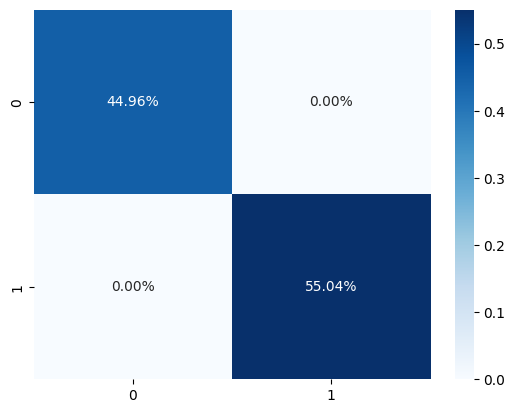

VotingClassifier 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

[[107   0]
 [  0 131]]


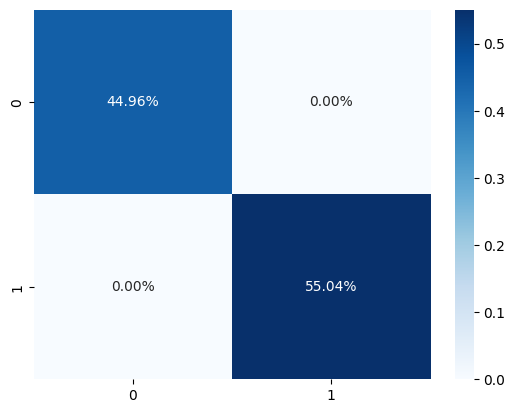

In [27]:
from sklearn.ensemble import VotingClassifier

# Create voting classifier
voting_clf_hard = VotingClassifier(estimators=[('svm', best_svm), ('logreg', best_logreg),
                                               ('tree', best_tree), ('rf', best_rf)], voting='hard')

voting_clf_soft = VotingClassifier(estimators=[('svm', best_svm), ('logreg', best_logreg),
                                               ('tree', best_tree), ('rf', best_rf)], voting='soft')

# Fit model
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# Predict
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

# Print performance metrics
for clf in (voting_clf_hard, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
    plt.show()


Results for SVM:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


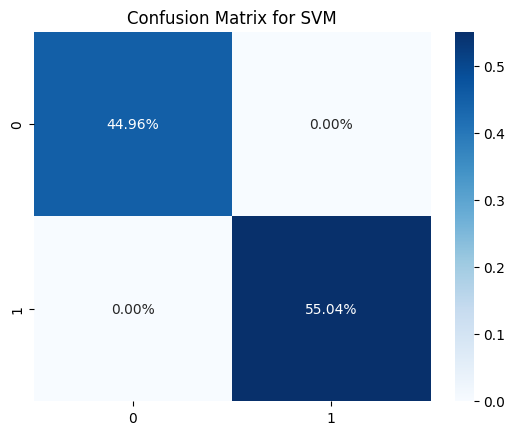

-------------------

Results for Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


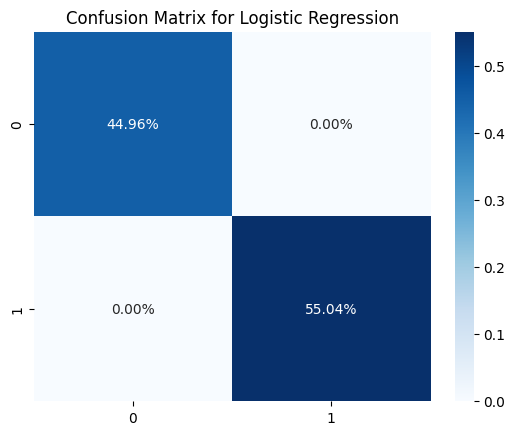

-------------------

Results for Decision Tree:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


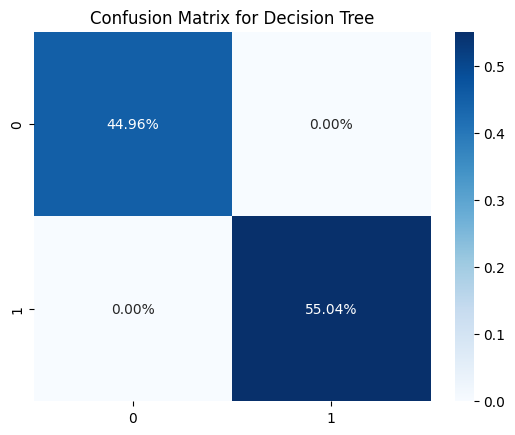

-------------------

Results for Random Forest:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


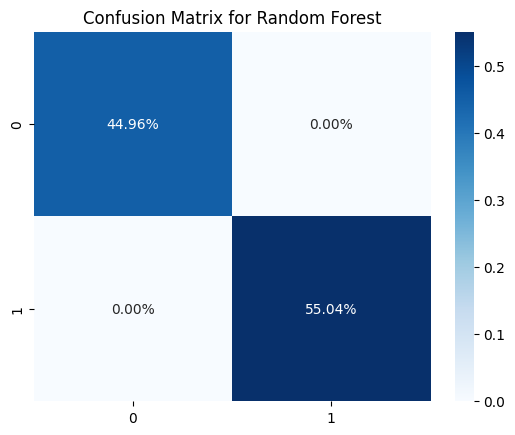

-------------------

Results for Voting Classifier Hard:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


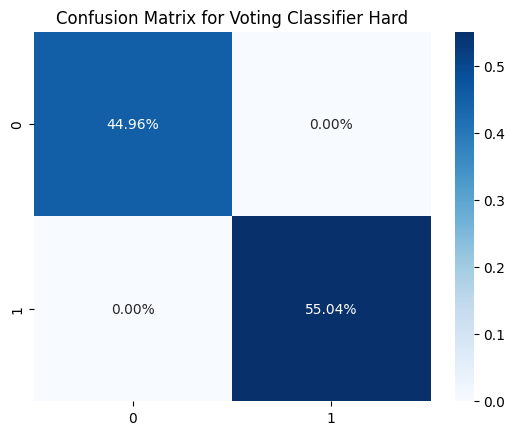

-------------------

Results for Voting Classifier Soft:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       131

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Confusion Matrix:
[[107   0]
 [  0 131]]


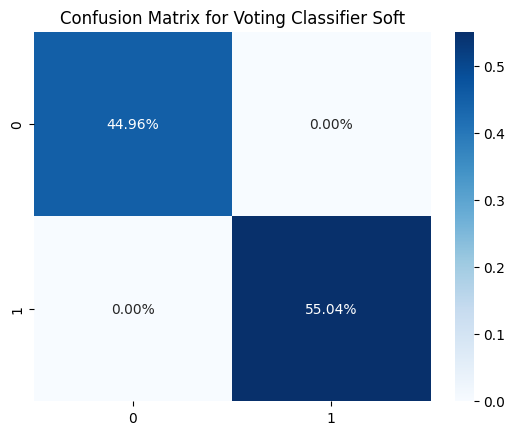

-------------------



In [28]:
# Individual models for comparison
individual_models = [best_svm, best_logreg, best_tree, best_rf]

# Names of models for display
model_names = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest',
               'Voting Classifier Hard', 'Voting Classifier Soft']

# Voting classifiers
voting_models = [voting_clf_hard, voting_clf_soft]

# Combine individual models and voting classifiers
all_models = individual_models + voting_models

for model, name in zip(all_models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cf_matrix)

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    print("-------------------\n")
